In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [6]:
df = pd.read_csv('final.csv', delimiter=';', encoding= 'unicode_escape')

In [3]:
tempic = pd.read_csv('final.csv', delimiter=';', encoding= 'unicode_escape') 

In [4]:
tempic.shape

(3865, 14)

In [5]:
tempic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Patient ID                                            3865 non-null   int64 
 1   Age recode with single ages and 85+                   3865 non-null   object
 2   Race/ethnicity                                        3865 non-null   object
 3   Sex                                                   3865 non-null   object
 4   Year of diagnosis                                     3865 non-null   int64 
 5   Site recode ICD-O-3/WHO 2008                          3865 non-null   object
 6   SEER historic stage A (1973-2015)                     3865 non-null   object
 7   Reason no cancer-directed surgery                     3865 non-null   object
 8   Vital status recode (study cutoff used)               3865 non-null 

In [8]:
df.head()

,Patient ID,Age recode with single ages and 85+,Race/ethnicity,Sex,Year of diagnosis,Site recode ICD-O-3/WHO 2008,SEER historic stage A (1973-2015),Reason no cancer-directed surgery,Vital status recode (study cutoff used),Survival months,Sequence number,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Median household income inflation adj to 2018
0,18477,15 years,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
1,70400,14 years,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
2,81204,18 years,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
3,82818,19 years,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
4,106645,14 years,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460,1st of 2 or more primaries,2,0,Unknown/missing/no match/Not 1990-2017


In [9]:
temp = df.drop_duplicates()
temp.shape

(2326, 14)

In [11]:
df = temp

In [15]:
temp.reset_index(drop=True)
df.reset_index(drop=True)


,Patient ID,Age recode with single ages and 85+,Race/ethnicity,Sex,Year of diagnosis,Site recode ICD-O-3/WHO 2008,SEER historic stage A (1973-2015),Reason no cancer-directed surgery,Vital status recode (study cutoff used),Survival months,Sequence number,Total number of in situ/malignant tumors for patient,Total number of benign/borderline tumors for patient,Median household income inflation adj to 2018
0,18477,15 years,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
1,70400,14 years,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
2,81204,18 years,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
3,82818,19 years,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
4,106645,14 years,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460,1st of 2 or more primaries,2,0,Unknown/missing/no match/Not 1990-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,75706668,09 years,White,Male,2016,Bones and Joints,Blank(s),Surgery performed,Alive,18,2nd of 2 or more primaries,2,0,"$45,000 - $49,999"
2322,75745390,08 years,Unknown,Female,2015,Soft Tissue including Heart,Unstaged,Not recommended,Alive,28,One primary only,1,0,"$55,000 - $59,999"
2323,75754218,02 years,White,Female,2016,Bones and Joints,Blank(s),Not recommended,Alive,12,One primary only,1,0,"$55,000 - $59,999"
2324,75801079,07 years,White,Female,2017,Bones and Joints,Blank(s),Surgery performed,Alive,5,One primary only,1,0,"$55,000 - $59,999"


In [17]:
df.rename(columns={'Patient ID':'id'}, inplace = True)

In [41]:
df.rename(columns={'Surgery':'surgery'}, inplace = True)

In [21]:
df.rename(columns={'Patient ID':'id',
                  'Age recode with single ages and 85+':'age',
                   'Race/ethnicity':'race',
                   'Sex':'sex',
                   'Year of diagnosis':'diagnosed',
                   'Site recode ICD-O-3/WHO 2008':'site',
                  'SEER historic stage A (1973-2015)':'stage',
                   'Reason no cancer-directed surgery':'surgery',
                   'Vital status recode (study cutoff used)':'status',
                  'Survival months':'months',
                   'Sequence number':'sequence_num',
                  'Total number of in situ/malignant tumors for patient':'malignant_num',
                   'Total number of benign/borderline tumors for patient':'benign_num',
                   'Median household income inflation adj to 2018':'property'
                  }, inplace = True)

In [22]:
df.head()

,id,age,race,sex,diagnosed,site,stage,Surgery,status,months,sequence_num,malignant_num,benign_num,property
0,18477,15 years,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
1,70400,14 years,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
2,81204,18 years,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
3,82818,19 years,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457,One primary only,1,0,Unknown/missing/no match/Not 1990-2017
4,106645,14 years,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460,1st of 2 or more primaries,2,0,Unknown/missing/no match/Not 1990-2017


In [99]:
temp = df
temp.to_csv('in_case.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 3864
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2326 non-null   int64  
 1   age            2326 non-null   int32  
 2   race           2316 non-null   object 
 3   sex            2326 non-null   object 
 4   diagnosed      2326 non-null   int64  
 5   site           2326 non-null   object 
 6   stage          2150 non-null   object 
 7   surgery        2326 non-null   object 
 8   status         2326 non-null   object 
 9   months         2323 non-null   float64
 10  sequence_num   2326 non-null   object 
 11  malignant_num  2326 non-null   float64
 12  benign_num     2326 non-null   float64
 13  property       2326 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(8)
memory usage: 263.5+ KB


In [34]:
df = df.replace('Unknown', np.nan)
df = df.replace('Blank(s)', np.nan)

In [65]:
df = df.replace('Unknown/missing/no match/Not 1990-2017', np.nan)

In [72]:
df

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
0,18477,15,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28.0,One primary only,1.0,0.0,NaN
1,70400,14,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17.0,One primary only,1.0,0.0,NaN
2,81204,18,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323.0,One primary only,1.0,0.0,NaN
3,82818,19,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457.0,One primary only,1.0,0.0,NaN
4,106645,14,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460.0,1st of 2 or more primaries,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,75706668,9,White,Male,2016,Bones and Joints,NaN,Surgery performed,Alive,18.0,2nd of 2 or more primaries,2.0,0.0,"$45,000 - $49,999"
2322,75745390,8,NaN,Female,2015,Soft Tissue including Heart,Unstaged,Not recommended,Alive,28.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2323,75754218,2,White,Female,2016,Bones and Joints,NaN,Not recommended,Alive,12.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2324,75801079,7,White,Female,2017,Bones and Joints,NaN,Surgery performed,Alive,5.0,One primary only,1.0,0.0,"$55,000 - $59,999"


In [71]:
temp = temp.reset_index(drop=True)
df = df.reset_index(drop=True)

In [36]:
df['age'] = df['age'].apply(lambda x: x.split(' ')[0])

In [38]:
df['age'] = df['age'].astype(int)

In [48]:
df['months'] = df['months'].astype(float)
df['malignant_num'] = df['malignant_num'].astype(float)
df['benign_num'] = df['benign_num'].astype(float)



In [52]:
temp = df.drop('Age', axis = 1)
df = temp

In [97]:
df.isna().sum()

id                 0
age                0
race              10
sex                0
diagnosed          0
site               0
stage              0
surgery            0
status             0
months             3
sequence_num       0
malignant_num      0
benign_num         0
property         338
dtype: int64

In [59]:
df['sex'].value_counts()

Male      1382
Female     944
Name: sex, dtype: int64

In [62]:
df['stage'].value_counts()

Regional     766
Localized    615
Distant      596
Unstaged     173
Name: stage, dtype: int64

In [64]:
df['surgery'].value_counts()

Surgery performed                                                               1396
Not recommended                                                                  641
Recommended but not performed, unknown reason                                    216
Unknown; death certificate; or autopsy only (2003+)                               42
Recommended, unknown if performed                                                 16
Not recommended, contraindicated due to other cond; autopsy only (1973-2002)       9
Recommended but not performed, patient refused                                     6
Name: surgery, dtype: int64

In [78]:
temp.loc[(temp['stage'] == 'Unstaged') & (temp['sequence_num'] == 'One primary only'), 'stage'] = 'Localized'
temp

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
0,18477,15,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28.0,One primary only,1.0,0.0,NaN
1,70400,14,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17.0,One primary only,1.0,0.0,NaN
2,81204,18,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323.0,One primary only,1.0,0.0,NaN
3,82818,19,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457.0,One primary only,1.0,0.0,NaN
4,106645,14,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460.0,1st of 2 or more primaries,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,75706668,9,White,Male,2016,Bones and Joints,NaN,Surgery performed,Alive,18.0,2nd of 2 or more primaries,2.0,0.0,"$45,000 - $49,999"
2322,75745390,8,NaN,Female,2015,Soft Tissue including Heart,Localized,Not recommended,Alive,28.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2323,75754218,2,White,Female,2016,Bones and Joints,NaN,Not recommended,Alive,12.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2324,75801079,7,White,Female,2017,Bones and Joints,NaN,Surgery performed,Alive,5.0,One primary only,1.0,0.0,"$55,000 - $59,999"


In [79]:
df['stage'].value_counts()

Localized    777
Regional     766
Distant      596
Unstaged      11
Name: stage, dtype: int64

In [98]:
df = temp

In [85]:
temp.loc[(temp['stage'] == 'Unstaged') & (temp['malignant_num'] >= 3), 'stage'] = 'Distant'
temp.loc[(temp['stage'] == 'Unstaged') & (temp['malignant_num'] <3), 'stage'] = 'Regional'

In [86]:
df['stage'].value_counts()

Localized    777
Regional     775
Distant      598
Name: stage, dtype: int64

In [92]:
df.shape

(2326, 14)

In [94]:
temp.loc[temp['stage'].isna()]

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
110,1231328,0,White,Male,2011,Other Endocrine including Thymus,NaN,Not recommended,Dead,2.0,One primary only,1.0,0.0,"$75,000+"
122,1410586,16,White,Female,2016,Bones and Joints,NaN,Not recommended,Alive,17.0,One primary only,1.0,0.0,"$75,000+"
124,1466381,1,Other Asian (1991+),Female,2017,Soft Tissue including Heart,NaN,Surgery performed,Alive,6.0,One primary only,1.0,0.0,"$75,000+"
125,1473685,17,White,Male,2017,Bones and Joints,NaN,Not recommended,Alive,2.0,One primary only,1.0,0.0,"$75,000+"
243,6183069,17,White,Female,2008,Other Endocrine including Thymus,NaN,Not recommended,Dead,23.0,One primary only,1.0,0.0,"$75,000+"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,75696653,18,White,Male,2016,Bones and Joints,NaN,Surgery performed,Alive,17.0,One primary only,1.0,0.0,"$35,000 - $39,999"
2321,75706668,9,White,Male,2016,Bones and Joints,NaN,Surgery performed,Alive,18.0,2nd of 2 or more primaries,2.0,0.0,"$45,000 - $49,999"
2323,75754218,2,White,Female,2016,Bones and Joints,NaN,Not recommended,Alive,12.0,One primary only,1.0,0.0,"$55,000 - $59,999"
2324,75801079,7,White,Female,2017,Bones and Joints,NaN,Surgery performed,Alive,5.0,One primary only,1.0,0.0,"$55,000 - $59,999"


In [95]:
temp.loc[(temp['stage'].isna()) & (temp['sequence_num'] == 'One primary only'), 'stage'] = 'Localized'
temp.loc[(temp['stage'].isna()) & (temp['malignant_num'] >= 3), 'stage'] = 'Distant'
temp.loc[(temp['stage'].isna()) & (temp['malignant_num'] <3), 'stage'] = 'Regional'

In [101]:
temp.loc[temp['property'].isna()]

,id,age,race,sex,diagnosed,site,stage,surgery,status,months,sequence_num,malignant_num,benign_num,property
0,18477,15,White,Male,1980,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Dead,28.0,One primary only,1.0,0.0,NaN
1,70400,14,White,Female,1977,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,17.0,One primary only,1.0,0.0,NaN
2,81204,18,White,Male,1980,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,323.0,One primary only,1.0,0.0,NaN
3,82818,19,White,Male,1979,Bones and Joints,Localized,"Recommended but not performed, unknown reason",Alive,457.0,One primary only,1.0,0.0,NaN
4,106645,14,White,Female,1979,Bones and Joints,Localized,Surgery performed,Alive,460.0,1st of 2 or more primaries,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,29910012,18,White,Male,1986,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Alive,338.0,One primary only,1.0,0.0,NaN
1067,29910078,9,White,Male,1986,Bones and Joints,Regional,"Recommended but not performed, unknown reason",Alive,377.0,One primary only,1.0,0.0,NaN
1068,29910133,13,White,Male,1986,Bones and Joints,Distant,Surgery performed,Dead,20.0,One primary only,1.0,0.0,NaN
1069,29910416,18,White,Male,1986,Bones and Joints,Distant,"Recommended but not performed, unknown reason",Dead,22.0,One primary only,1.0,0.0,NaN


In [104]:
df['race'].value_counts()

White                                     2070
Black                                       83
American Indian/Alaska Native               25
Other Asian (1991+)                         21
Hawaiian                                    20
Filipino                                    16
Chinese                                     14
Asian Indian or Pakistani, NOS (1988+)      14
Asian Indian (2010+)                         9
Korean (1988+)                               8
Other                                        6
Vietnamese (1988+)                           6
Thai (1994+)                                 5
Samoan (1991+)                               5
Pakistani (2010+)                            4
Tongan (1991+)                               3
Japanese                                     2
Pacific Islander, NOS (1991+)                2
Guamanian, NOS (1991+)                       1
Laotian (1988+)                              1
Kampuchean (1988+)                           1
Name: race, d

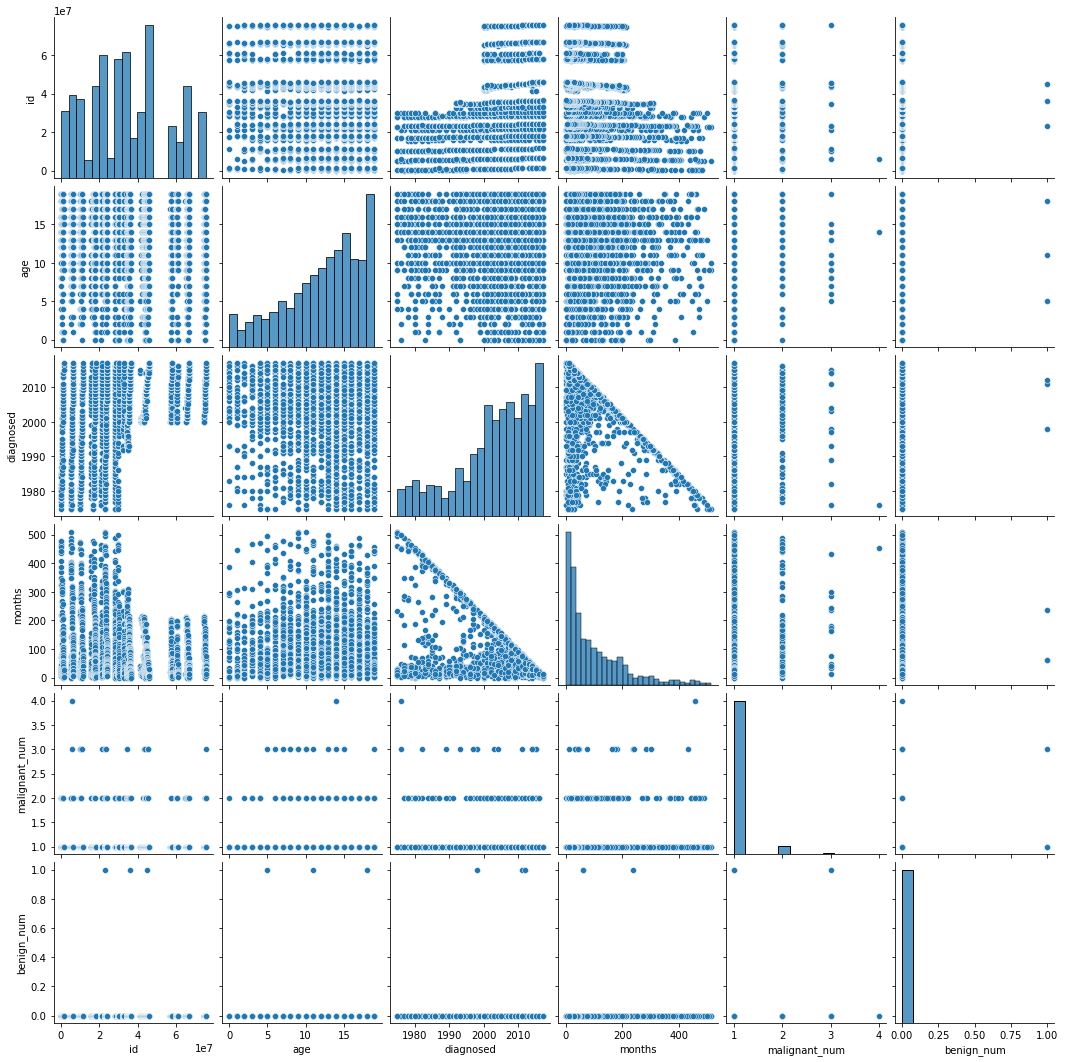

In [105]:
sns.pairplot(df)